In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Ionosphere\Ionosphere_NL_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,NaN,0.0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1.0,NaN,1.00000,NaN,0.93035,-0.36156,-0.10868,-0.93597,NaN,NaN,...,-0.20332,NaN,-0.20468,-0.18401,-0.19040,NaN,NaN,-0.06288,NaN,-0.02447
2,NaN,0.0,NaN,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,NaN,0.0,1.00000,-0.45161,1.00000,NaN,0.71216,-1.00000,NaN,0.00000,...,1.00000,NaN,0.51613,1.00000,1.00000,NaN,0.25682,1.00000,-0.32382,1.00000
4,NaN,NaN,1.00000,-0.02401,0.94140,0.06531,NaN,NaN,0.77152,NaN,...,0.03286,-0.65158,0.13290,-0.53206,NaN,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1.0,0.0,0.83508,NaN,0.73739,NaN,0.84349,-0.05567,NaN,-0.04622,...,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,NaN,-0.10714,0.90546,-0.04307
347,1.0,0.0,NaN,0.00419,0.95183,-0.02723,NaN,-0.01920,0.94590,0.01606,...,0.94520,0.01361,0.93522,0.04925,NaN,0.08168,0.94066,-0.00035,NaN,0.04712
348,NaN,0.0,NaN,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577
349,1.0,0.0,NaN,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,0.91050,-0.02099,0.89147,-0.07760,NaN,-0.17238,0.96022,-0.03757,0.87403,-0.16243


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	138
float64		column 2	104
float64		column 3	104
float64		column 4	70
float64		column 5	36
float64		column 6	70
float64		column 7	68
float64		column 8	68
float64		column 9	104
float64		column 10	68
float64		column 11	68
float64		column 12	70
float64		column 13	138
float64		column 14	0
float64		column 15	104
float64		column 16	34
float64		column 17	104
float64		column 18	70
float64		column 19	104
float64		column 20	104
float64		column 21	102
float64		column 22	34
float64		column 23	104
float64		column 24	34
float64		column 25	34
float64		column 26	34
float64		column 27	34
float64		column 28	0
float64		column 29	34
float64		column 30	68
float64		column 31	70
float64		column 32	70
float64		column 33	102
float64		column 34	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,213.000000,247.0,247.000000,281.000000,315.000000,281.000000,283.000000,283.000000,247.000000,283.000000,...,317.000000,317.000000,317.000000,351.000000,317.000000,283.000000,281.000000,281.000000,249.000000,351.000000
mean,0.906103,0.0,0.670566,0.071445,0.609585,0.109312,0.575256,0.087423,0.539382,0.164132,...,0.422175,-0.083274,0.570351,-0.069538,0.386624,-0.041102,0.378070,-0.000643,0.322353,0.014480
std,0.292372,0.0,0.453187,0.407049,0.504207,0.427098,0.476813,0.493055,0.450991,0.450861,...,0.556098,0.499408,0.474965,0.550025,0.569031,0.474680,0.507756,0.455789,0.494216,0.468337
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.550410,-0.037300,0.433805,-0.019890,0.308935,-0.054840,0.236170,-0.043620,...,0.000000,-0.331450,0.343740,-0.443165,0.000000,-0.220970,0.000000,-0.196810,0.000000,-0.165350
50%,1.000000,0.0,0.862840,0.022540,0.804620,0.029190,0.742650,0.010060,0.666670,0.016060,...,0.561210,-0.019420,0.708240,-0.017690,0.496640,0.000000,0.431370,0.000000,0.388950,0.000000
75%,1.000000,0.0,0.995920,0.190490,1.000000,0.261310,0.969240,0.325550,0.900845,0.363715,...,0.900710,0.134120,0.991880,0.153535,0.894150,0.097310,0.814290,0.164650,0.732080,0.171660
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

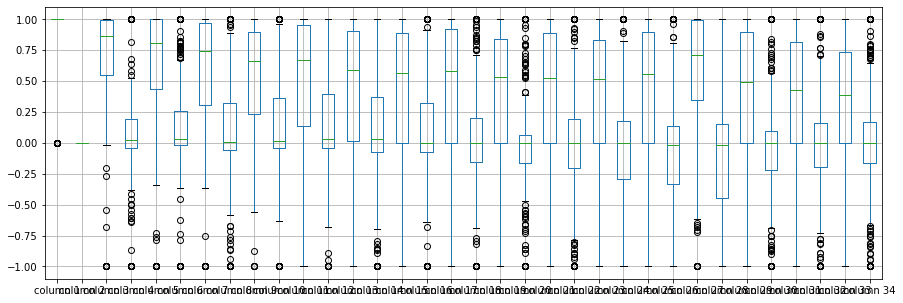

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     0.906103
column 2     0.000000
column 3     0.670566
column 4     0.071445
column 5     0.609585
column 6     0.109312
column 7     0.575256
column 8     0.087423
column 9     0.539382
column 10    0.164132
column 11    0.507999
column 12    0.160018
column 13    0.456563
column 14    0.093414
column 15    0.371183
column 16    0.079405
column 17    0.433121
column 18    0.025394
column 19    0.365782
column 20   -0.004778
column 21    0.384744
column 22    0.023657
column 23    0.371125
column 24   -0.043685
column 25    0.422175
column 26   -0.083274
column 27    0.570351
column 28   -0.069538
column 29    0.386624
column 30   -0.041102
column 31    0.378070
column 32   -0.000643
column 33    0.322353
column 34    0.014480
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,NaN,0.284594,-0.134665,0.156830,0.339153,0.178143,0.060502,0.047456,-0.057910,...,0.055686,0.133035,-0.140846,-0.030931,0.245323,-0.131403,-0.006005,-0.098783,0.223147,0.130581
column 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
column 3,0.284594,NaN,1.000000,0.167117,0.481481,0.042349,0.393771,0.123242,0.462558,0.144774,...,0.331981,-0.031729,0.062923,0.095664,0.357325,0.069138,0.198812,-0.082249,0.210251,0.008840
column 4,-0.134665,NaN,0.167117,1.000000,-0.002137,-0.051979,-0.257471,0.183261,-0.364297,0.179313,...,-0.106404,-0.174158,0.010250,0.035850,-0.050024,0.237325,-0.133310,0.070471,-0.149472,0.050415
column 5,0.156830,NaN,0.481481,-0.002137,1.000000,-0.048269,0.609838,-0.000659,0.442380,0.034174,...,0.254567,0.021542,0.192369,0.178243,0.234448,-0.047607,0.363575,0.027979,0.381965,-0.089607
column 6,0.339153,NaN,0.042349,-0.051979,-0.048269,1.000000,0.011742,0.355736,-0.170599,0.136263,...,-0.160637,-0.039038,-0.149739,-0.135779,-0.111185,-0.074213,-0.117883,0.222224,0.037292,0.137155
column 7,0.178143,NaN,0.393771,-0.257471,0.609838,0.011742,1.000000,-0.145992,0.557731,0.006526,...,0.323145,0.071255,0.079400,0.082443,0.275667,-0.051750,0.419546,0.073879,0.551012,-0.041800
column 8,0.060502,NaN,0.123242,0.183261,-0.000659,0.355736,-0.145992,1.000000,-0.189635,0.277502,...,-0.153566,-0.089232,-0.186102,0.085252,-0.113224,0.088977,-0.105280,0.185658,-0.191221,0.403471
column 9,0.047456,NaN,0.462558,-0.364297,0.442380,-0.170599,0.557731,-0.189635,1.000000,-0.247137,...,0.390369,0.082878,0.188519,0.074202,0.384614,-0.083411,0.282582,-0.034482,0.329335,-0.119196
column 10,-0.057910,NaN,0.144774,0.179313,0.034174,0.136263,0.006526,0.277502,-0.247137,1.000000,...,-0.219208,-0.047769,-0.201383,0.042255,-0.133048,-0.065573,-0.125707,-0.024904,-0.097083,0.027536


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [34,34+58,34+58+58,34+58+58+58,34+58+58+58+58,34+58+58+58,34+58+58,34+58,34], vae_layer = False, seed = 580)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 15.597789991469611
Epoch: 1 , loss: 15.593134516761417
Epoch: 2 , loss: 15.525176048278809
Epoch: 3 , loss: 15.455214318774996
Epoch: 4 , loss: 15.47067896525065
Epoch: 5 , loss: 15.436776297433036
Epoch: 6 , loss: 15.27455320812407
Epoch: 7 , loss: 15.263056482587542
Epoch: 8 , loss: 15.050137111118861
Epoch: 9 , loss: 14.903154373168945
Epoch: 10 , loss: 13.971762566339402
Epoch: 11 , loss: 13.690388179960705
Epoch: 12 , loss: 13.507748876299177
Epoch: 13 , loss: 13.552618662516275
Epoch: 14 , loss: 13.489115260896229
Epoch: 15 , loss: 13.34594608488537
Epoch: 16 , loss: 13.386741865248908
Epoch: 17 , loss: 13.434947195507231
Epoch: 18 , loss: 13.247351782662529
Epoch: 19 , loss: 13.242680912926083
Epoch: 20 , loss: 13.314672515505837
Epoch: 21 , loss: 13.245635078066872
Epoch: 22 , loss: 13.134658631824312
Epoch: 23 , loss: 13.101740882510232
Epoch: 24 , loss: 13.004898525419689
Epoch: 25 , loss: 13

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(351, 34)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    -0.210714
column 2     0.000000
column 3    -0.190618
column 4     1.000000
column 5     0.000000
column 6     0.007851
column 7     0.000000
column 8     0.000000
column 9    -0.163588
column 10   -1.000000
column 11    0.000000
column 12    0.000000
column 13   -0.155060
column 14    0.000000
column 15   -1.000000
column 16   -0.003904
column 17   -0.161765
column 18   -1.000000
column 19   -1.000000
column 20    1.000000
column 21   -1.000000
column 22   -0.020270
column 23    0.000000
column 24    0.000000
column 25    0.000000
column 26    0.000000
column 27    1.000000
column 28   -1.000000
column 29   -1.000000
column 30    1.000000
column 31   -0.125124
column 32    1.000000
column 33   -1.000000
column 34    1.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Ionosphere.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,-0.131766,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
1,0.000000,0.000132,0.000000,0.205159,0.0,0.000000,0.000000,0.000000,-0.583365,0.113955,...,0.0,0.232115,0.0,0.0,0.000000,0.088426,0.485151,0.0,0.432398,0.0
2,-0.390393,0.000000,-0.465746,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
3,0.271060,0.000000,0.000000,0.000000,0.0,-0.905276,0.000000,0.000000,0.982622,0.000000,...,0.0,-0.977152,0.0,0.0,0.000000,0.136819,0.000000,0.0,0.000000,0.0
4,-0.510337,-0.000403,0.000000,0.000000,0.0,0.000000,-0.532470,0.251709,0.000000,0.234204,...,0.0,0.000000,0.0,0.0,0.296749,0.000000,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,0.000000,0.000000,0.000000,-0.076561,0.0,0.204423,0.000000,0.000000,0.057282,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,-0.127745,0.0,0.000000,0.0
347,0.000000,0.000000,-0.228949,0.000000,0.0,0.000000,-0.265113,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,-0.370764,0.000000,0.000000,0.0,-0.451531,0.0
348,-0.125665,0.000000,-0.201317,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
349,0.000000,0.000000,0.450224,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.269860,0.000000,0.000000,0.0,0.000000,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

28.833436365071147

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

68.46016929900117

In [18]:
NRMS=numerator/denominator
NRMS


0.42117097664688113

In [19]:
new_df.iloc[66,:]

column 1     1.000000
column 2     0.000338
column 3     0.867934
column 4     0.020219
column 5     1.000000
column 6     0.048106
column 7     1.000000
column 8     0.077640
column 9     0.776850
column 10    0.043170
column 11    0.987620
column 12    0.332660
column 13    0.735045
column 14    0.054890
column 15    1.000000
column 16    0.056360
column 17    0.957500
column 18   -0.245980
column 19    0.843710
column 20   -0.086680
column 21    0.670375
column 22    0.080676
column 23    0.999330
column 24    0.273760
column 25    1.000000
column 26   -0.390560
column 27    0.964140
column 28   -0.021740
column 29    0.867470
column 30    0.233600
column 31    0.945780
column 32   -0.220210
column 33    0.803550
column 34   -0.073290
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0.868234,0.000000,0.995390,-0.058890,0.85243,0.023060,0.833980,-0.377080,1.000000,0.037600,...,0.56811,-0.511710,0.41078,-0.46168,0.212660,-0.340900,0.422670,-0.54487,0.186410,-0.45300
1,1.000000,0.000132,1.000000,0.016869,0.93035,-0.361560,-0.108680,-0.935970,0.416635,0.068465,...,-0.20332,-0.033575,-0.20468,-0.18401,-0.190400,-0.027504,0.318891,-0.06288,0.295018,-0.02447
2,0.609607,0.000000,0.534254,-0.033650,1.00000,0.004850,1.000000,-0.120620,0.889650,0.011980,...,0.57528,-0.402200,0.58984,-0.22145,0.431000,-0.173650,0.604360,-0.24180,0.560450,-0.38238
3,1.271060,0.000000,1.000000,-0.451610,1.00000,0.094724,0.712160,-1.000000,0.982622,0.000000,...,1.00000,-0.070202,0.51613,1.00000,1.000000,-0.064171,0.256820,1.00000,-0.323820,1.00000
4,0.489663,-0.000403,1.000000,-0.024010,0.94140,0.065310,0.388590,0.019159,0.771520,0.070214,...,0.03286,-0.651580,0.13290,-0.53206,0.321059,-0.621970,-0.057070,-0.59573,-0.046080,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1.000000,0.000000,0.835080,0.006419,0.73739,0.057363,0.843490,-0.055670,0.961692,-0.046220,...,0.95378,-0.042020,0.83479,0.00123,1.000000,0.128150,0.738855,-0.10714,0.905460,-0.04307
347,1.000000,0.000000,0.722181,0.004190,0.95183,-0.027230,0.669267,-0.019200,0.945900,0.016060,...,0.94520,0.013610,0.93522,0.04925,0.560826,0.081680,0.940660,-0.00035,0.463299,0.04712
348,0.874335,0.000000,0.745693,-0.000340,0.93207,-0.032270,0.951770,-0.034310,0.955840,0.024460,...,0.93988,0.031930,0.92489,0.02542,0.921200,0.022420,0.924590,0.00442,0.926970,-0.00577
349,1.000000,0.000000,1.356304,-0.016570,0.98122,-0.019890,0.956910,-0.036460,0.857460,0.001100,...,0.91050,-0.020990,0.89147,-0.07760,1.099690,-0.172380,0.960220,-0.03757,0.874030,-0.16243


In [21]:
imputations[-1].to_excel("Ionosphere_NL_20(imp).xlsx", index=False, header=False)